# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Tracker tareas y versiones
 - Crear conexiones, directorios y cargar dataset
 - Escritura de datos en una common folder

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Carga del dataset desde la plataforma Kaggle

In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.6.8-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.8
    Uninstalling kaggle-1.6.8:
      Successfully uninstalled kaggle-1.6.8


In [ ]:
# !pip install --upgrade --force-reinstall --no-deps opencv-python
!pip install opencv-python

In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"danielyzuel","key":"7aeffdf464c19c0db64d9adac80e6619"}'}

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                     Online Food Dataset                             3KB  2024-03-02 18:50:30          16008        321  0.9411765        
saurabhbadole/latest-data-science-job-salaries-2024     Latest Data Science Job Salaries 2020 - 2024   69KB  2024-03-26 19:00:33           1021         26  1.0              
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17          23129        379  1.0              
bhavikjikadara/student-study-performance                Student Study Performance                       9KB  2024-03-07 06:14:09  

In [ ]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
!kaggle competitions download -c plant-seedlings-classification
#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

 99% 1.67G/1.69G [00:22<00:00, 78.6MB/s]
100% 1.69G/1.69G [00:22<00:00, 79.5MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip plant-seedlings-classification.zip -d my_dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: my_dataset/test/ad12382d4.png  
  inflating: my_dataset/test/adb7a032c.png  
  inflating: my_dataset/test/ae90f2827.png  
  inflating: my_dataset/test/aecfaed64.png  
  inflating: my_dataset/test/aee6fa3df.png  
  inflating: my_dataset/test/af45e222a.png  
  inflating: my_dataset/test/afa446484.png  
  inflating: my_dataset/test/afcf6abd5.png  
  inflating: my_dataset/test/b026bf8ca.png  
  inflating: my_dataset/test/b03397525.png  
  inflating: my_dataset/test/b0acaff4a.png  
  inflating: my_dataset/test/b130a0632.png  
  inflating: my_dataset/test/b145ba9d4.png  
  inflating: my_dataset/test/b1cd2a91e.png  
  inflating: my_dataset/test/b215531dd.png  
  inflating: my_dataset/test/b2706e2b3.png  
  inflating: my_dataset/test/b29339405.png  
  inflating: my_dataset/test/b30ab4659.png  
  inflating: my_dataset/test/b31292706.png  
  inflating: my_dataset/test/b341d0aab.png  
  inflating: my_dataset/test/b39c71707.

In [ ]:
!ls my_dataset/test/

0021e90e4.png  29ce426a1.png  5779fe8b4.png  8104422bb.png  a9d2eab61.png  d350a25fa.png
003d61042.png  29f49cd0b.png  5817b766d.png  8170d33c1.png  aa7d098d1.png  d41d87796.png
007b3da8b.png  2a5064f19.png  5883b423d.png  824f5d4e5.png  aad8375e0.png  d488a4fe1.png
0086a6340.png  2a667e099.png  589e643b8.png  827279bad.png  aaf4da98f.png  d515398fd.png
00c47e980.png  2b55a2da2.png  590f5aea6.png  82b5f4d33.png  ab0f67743.png  d563be369.png
00d090cde.png  2bd74d2da.png  592473c83.png  8301b0547.png  ab35453cb.png  d5f7dd60a.png
00ef713a8.png  2d5058a59.png  592cc5b89.png  8303b27ed.png  abc331628.png  d668409ff.png
01291174f.png  2d992d1fb.png  59358cd44.png  8311740de.png  abf8b0772.png  d689256be.png
026716f9b.png  2d9c798f9.png  593896f83.png  835dc5447.png  ac3193f78.png  d6c8c3c48.png
02cfeb38d.png  2dd5cfba9.png  599691cd9.png  837ac0270.png  ac75d3326.png  d6d31dcbe.png
03566743d.png  2df78338c.png  599c82eea.png  8455169fe.png  acdb75e00.png  d6d80a321.png
03a2ee656.png  2e86f1

## Escritura de datos tomando como referencia un BASE_FOLDER

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

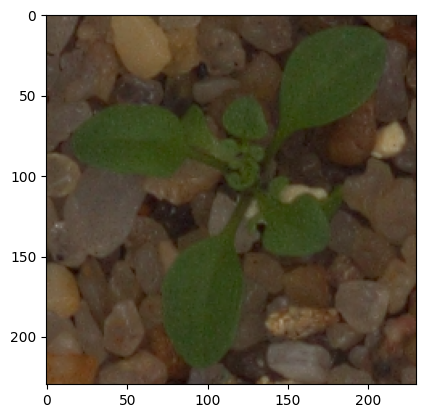

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

# Escogiendo y mostrando una imagen al azar del conjunto de test
folder_path = '/content/my_dataset/test/'
files = os.listdir(folder_path)
random_file = random.choice(files)
random_file_path = os.path.join(folder_path, random_file)
img = cv2.imread(random_file_path, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# Almacenando una imagen aleatoria de test en mi BASE_FOLDER
cv2.imwrite(BASE_FOLDER + random_file, img)

True

## Ejemplo de generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [ ]:
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$BASE_FOLDER$name_IPYNB_file' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of pro